<a href="https://colab.research.google.com/github/Uberwald/-/blob/main/5_3_%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9_%D0%B8_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Поиск аномалий и выбросов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#клонрирование репозитория
#'https://github.com/Lasttrader/DA_repo'

!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 60 (delta 0), reused 1 (delta 0), pack-reused 58
Unpacking objects: 100% (60/60), done.


In [ ]:
#подгржуаем данные
data = pd.read_csv('/content/DA_repo/boston_houses.csv', index_col = 0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns.tolist()
#LotFrontage - веранда перед домом

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
data.LotFrontage.value_counts()
#посмотрим содержимое колонки

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
data.LotFrontage.nunique()
#Посмотрим количество уникальных значений

110

In [ ]:
#Смотрим наличие пропусков в колонке LotFrontage
data.LotFrontage.isna().sum()

259

In [ ]:
#Сколько всего элементов
data.LotFrontage.shape[0]

1460

In [ ]:
#Процень пропущенных значений
data.LotFrontage.isna().sum() / data.LotFrontage.shape[0] * 100

17.73972602739726

In [ ]:
#Заполним значения средним
data.LotFrontage = data.LotFrontage.fillna(data.LotFrontage.mean())

In [ ]:
#Смотрим наличие пропусков в колонке LotFrontage
data.LotFrontage.isna().sum()

0

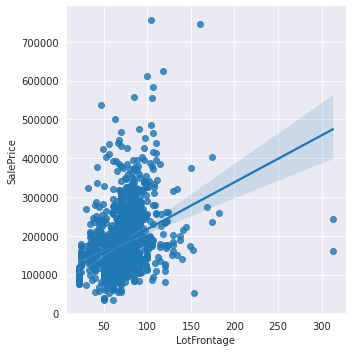

In [ ]:
#График стоимости дома от признака LotFrontage
sns.lmplot(data = data, x = 'LotFrontage', y = 'SalePrice')
plt.show()

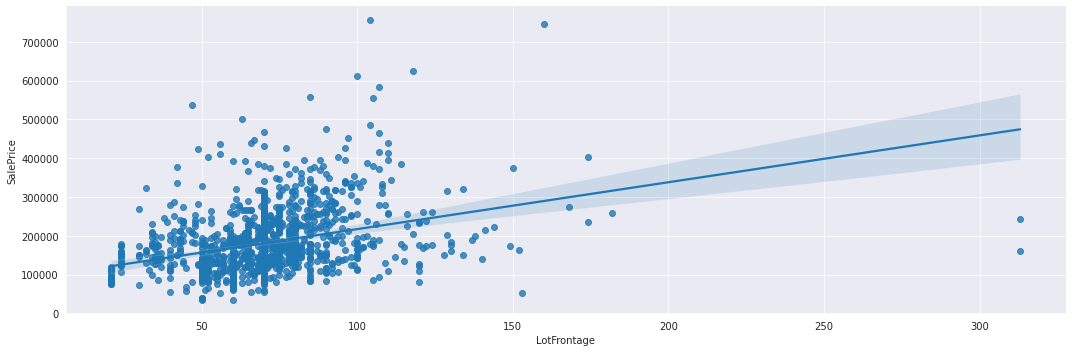

In [ ]:
#График получился сплющенный, добавим ширину и высоту
sns.lmplot(data = data, x = 'LotFrontage', y = 'SalePrice', aspect = 3, height = 5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


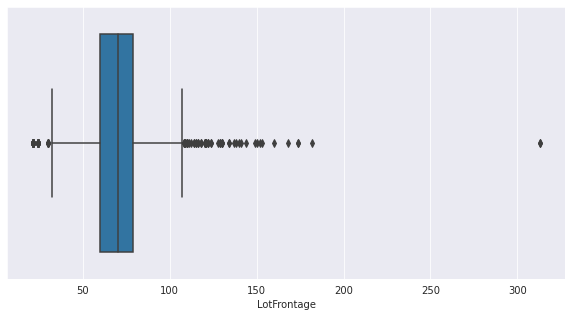

In [ ]:
#Нарисуем "Ящик с усами" boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data.LotFrontage)
plt.show()

In [ ]:
#Разобъём на квартили по 10%
price_bins = data.SalePrice.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

price_bins

0.0     34900.0
0.1    106475.0
0.2    124000.0
0.3    135500.0
0.4    147000.0
0.5    163000.0
0.6    179280.0
0.7    198620.0
0.8    230000.0
0.9    278000.0
1.0    755000.0
Name: SalePrice, dtype: float64

In [ ]:
#Признак с ценовой группой
data['Group_price'] = pd.cut(data.SalePrice, price_bins, labels = ['1', '2','3','4','5','6','7','8','9','10',], right = True, include_lowest = True)
#include_lowest включаем нижние значения

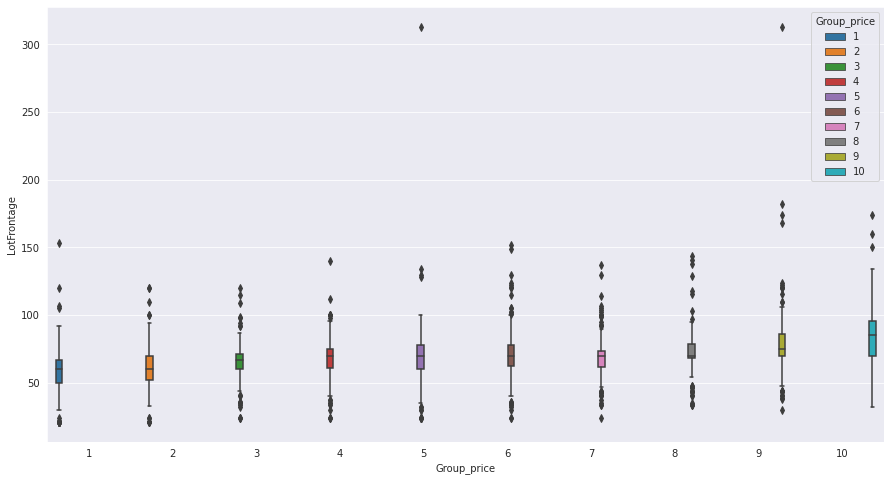

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = data, y = 'LotFrontage', x = 'Group_price', hue = 'Group_price')
#hue = 'Group_price' разные цвета для ценовых груп
plt.show()